In [7]:
from tdavec.TDAvectorizer import *
import matplotlib.pyplot as plt

Here I am creating some sample point cloud

In [18]:
def createCircle(n = 100, x0=0, y0=0, r=1, eps = 0.1):
    phi = np.random.uniform(0,2*np.pi,n)
    rho = np.random.uniform(1-eps,1+eps,n)
    x = x0 + r * rho * np.cos(phi)
    y = y0 + r * rho * np.sin(phi)
    return np.vstack([x,y]).T
def createTwoCircles(n = 100, rat = 0.5, r = 1, eps = 0.1):
    X1 = createCircle(int(rat*n), x0=0, y0 = rat*r, r = rat*r, eps = eps)
    X2 = createCircle(int( (1-rat)*n), x0=0, y0 = -(1-rat)*r, r = (1-rat)*r, eps = eps)
    return np.vstack([X1, X2])


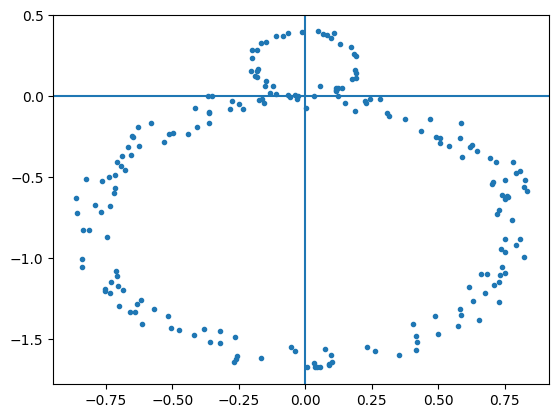

In [20]:

X = createTwoCircles(200, rat = 0.2)
plt.plot(X[:,0],X[:,1],'.')
plt.axhline(0); plt.axvline(0)